In [55]:
##Importing libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from lightgbm import LGBMClassifier


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#Loading the data
client = pd.read_csv("/content/drive/MyDrive/client_train.csv")
invoice = pd.read_csv("/content/drive/MyDrive/invoice_train.csv", low_memory=False)
Testclient = pd.read_csv("/content/drive/MyDrive/client_test.csv")
Testinvoice =  pd.read_csv("/content/drive/MyDrive/invoice_test.csv")
SampleSubmission =  pd.read_csv("/content/drive/MyDrive/SampleSubmission.csv")


<h1 style="color: blue;">1. Data understanding</h1>

In [58]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [59]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [60]:
client.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [61]:
invoice.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [62]:
client.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [63]:
invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


## what is found?

* Both invoice and client have a column in common(client_id) .

> which could be merged into one dataFrame
<hr>
<h1 style="color: blue;">2. Data cleaning </h1>

In [64]:
#Merge the data in one dataframe on client_id column!
train = pd.merge(client,invoice , on="client_id")
test = pd.merge(Testclient,Testinvoice , on="client_id")


In [65]:
#cheacking for null values

train.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [66]:
#train = train.drop(columns=['counter_statue'], axis=1)

In [67]:
# Initialize unique_category variable before the loop
unique_category = 0

# Decide which categorical variables you want to use in the model
for col_name in client.columns:
    if client[col_name].dtypes == 'object':
        unique_category = len(client[col_name].unique())
    print("The Features of '{col_name}' has a {unique_category} unique categories".format(col_name=col_name, unique_category=unique_category))


The Features of 'disrict' has a 0 unique categories
The Features of 'client_id' has a 135493 unique categories
The Features of 'client_catg' has a 135493 unique categories
The Features of 'region' has a 135493 unique categories
The Features of 'creation_date' has a 8088 unique categories
The Features of 'target' has a 8088 unique categories


In [68]:
# Initialize unique_category variable before the loop
unique_category = 0

# Decide which categorical variables you want to use in the model
for col_name in invoice.columns:
    if invoice[col_name].dtypes == 'object':
        unique_category = len(invoice[col_name].unique())
    print("The Features of '{col_name}' has a {unique_category} unique categories".format(col_name=col_name, unique_category=unique_category))




The Features of 'client_id' has a 135493 unique categories
The Features of 'invoice_date' has a 8275 unique categories
The Features of 'tarif_type' has a 8275 unique categories
The Features of 'counter_number' has a 8275 unique categories
The Features of 'counter_statue' has a 12 unique categories
The Features of 'counter_code' has a 12 unique categories
The Features of 'reading_remarque' has a 12 unique categories
The Features of 'counter_coefficient' has a 12 unique categories
The Features of 'consommation_level_1' has a 12 unique categories
The Features of 'consommation_level_2' has a 12 unique categories
The Features of 'consommation_level_3' has a 12 unique categories
The Features of 'consommation_level_4' has a 12 unique categories
The Features of 'old_index' has a 12 unique categories
The Features of 'new_index' has a 12 unique categories
The Features of 'months_number' has a 12 unique categories
The Features of 'counter_type' has a 2 unique categories


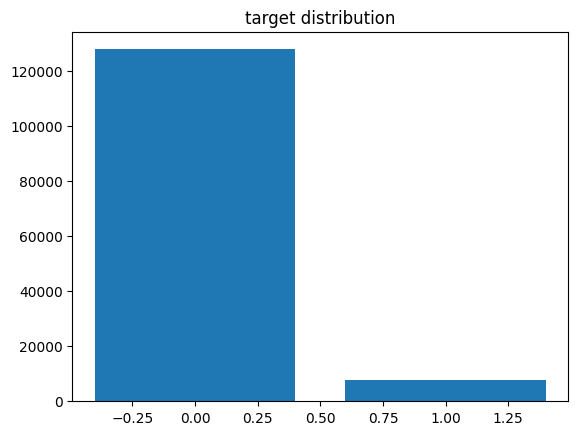

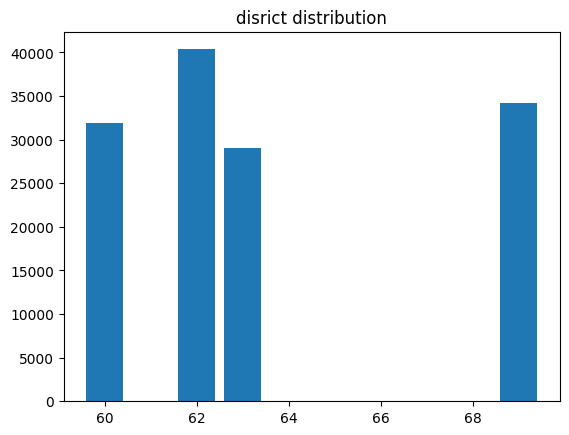

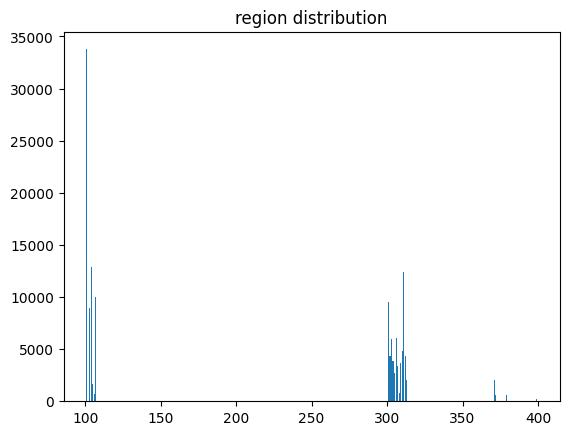

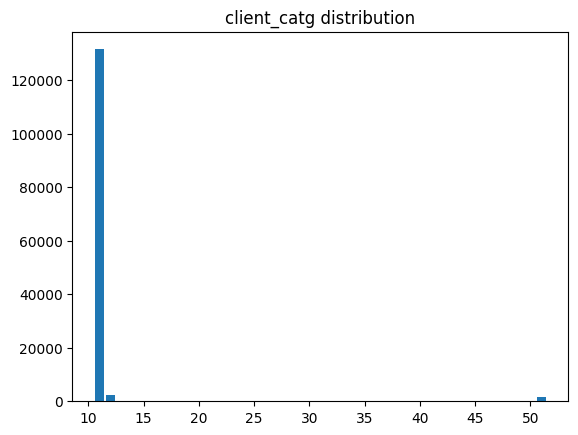

In [69]:

for col in ['target','disrict','region','client_catg']:
    viz = client.groupby([col])['client_id'].count()
    plt.bar(x=viz.index, height=viz.values)
    plt.title(col+' distribution')
    plt.show()

<ipython-input-70-544aec585ad8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(train.corr(), fignum=cm.number)


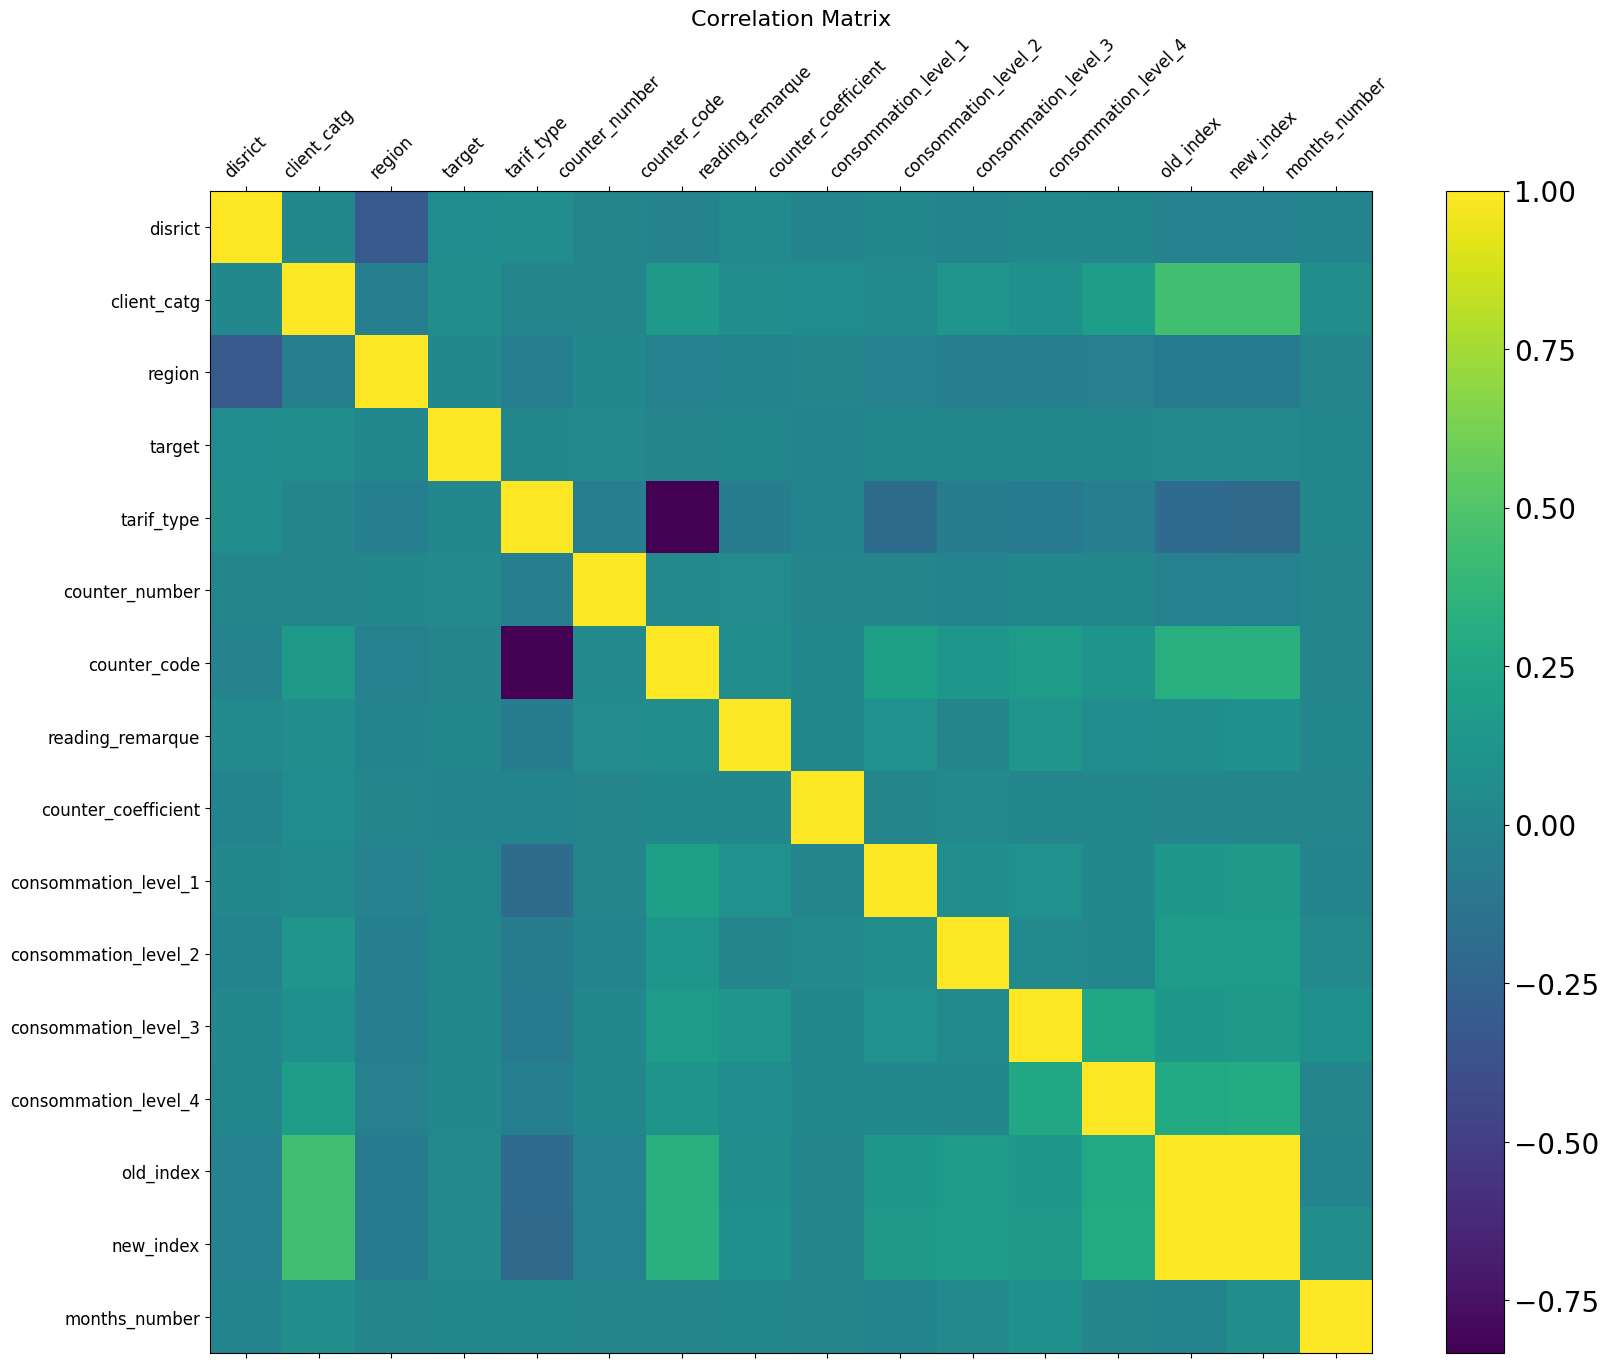

In [70]:
cm = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=cm.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=12, rotation=45)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=16);

In [71]:
#prepare the dtype.

#client_id
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
train["client_id"] = OE.fit_transform(train[["client_id"]])
test["client_id"] = OE.fit_transform(test[["client_id"]])

In [72]:
#counter_type
omet={'ELEC':0,"GAZ":1}
train['counter_type']=train["counter_type"].replace(omet)
test['counter_type']=test["counter_type"].replace(omet)
pd.to_numeric(train['counter_type'])
pd.to_numeric(test['counter_type'])

print(train['counter_type'].value_counts())

0    3079406
1    1397343
Name: counter_type, dtype: int64


In [73]:
#counter_statue
omes={'A':6,'0':0,'1':1,'5':5,'4':4}
train['counter_statue']=train["counter_statue"].replace(omes)
test['counter_statue']=test["counter_statue"].replace(omes)

print(train['counter_statue'].value_counts())

0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
6              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64


In [74]:
#converting invoice_date and creation_date datatype to datetime
#Extract Year, Month, and Day from both


train['invoice_date'] = pd.to_datetime(train['invoice_date'])
test['invoice_date'] = pd.to_datetime(test['invoice_date'])
train['creation_date'] = pd.to_datetime(train['creation_date'])
test['creation_date'] = pd.to_datetime(test['creation_date'])

#invoice_date

train['invoice_date']=pd.to_datetime(train['invoice_date'])
train['day'] = train['invoice_date'].dt.day
train['month'] = train['invoice_date'].dt.month
train['year'] = train['invoice_date'].dt.year
train['invoice_date']=train['day']+train['month']*100+train['year']*10000
train=train.drop(['day','month','year'],axis=1)

test['invoice_date']=pd.to_datetime(test['invoice_date'])
test['day'] = test['invoice_date'].dt.day
test['month'] = test['invoice_date'].dt.month
test['year'] = test['invoice_date'].dt.year
test['invoice_date']=test['day']+test['month']*100+test['year']*10000
test=test.drop(['day','month','year'],axis=1)

#creation_date
train['creation_date']=pd.to_datetime(train['creation_date'])
train['day'] = train['creation_date'].dt.day
train['month'] = train['creation_date'].dt.month
train['year'] = train['creation_date'].dt.year
train['creation_date']=train['day']+train['month']*100+train['year']*10000
train=train.drop(['day','month','year'],axis=1)


test['creation_date']=pd.to_datetime(test['creation_date'])
test['day'] = test['creation_date'].dt.day
test['month'] = test['creation_date'].dt.month
test['year'] = test['creation_date'].dt.year
test['creation_date']=test['day']+test['month']*100+test['year']*10000
test=test.drop(['day','month','year'],axis=1)

<ipython-input-74-3f8a33449099>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train['creation_date'] = pd.to_datetime(train['creation_date'])
<ipython-input-74-3f8a33449099>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test['creation_date'] = pd.to_datetime(test['creation_date'])


In [75]:
train['invoice_date']

0          20140324
1          20130329
2          20150323
3          20150713
4          20161117
             ...   
4476744    20050819
4476745    20051219
4476746    19960925
4476747    19960528
4476748    19960125
Name: invoice_date, Length: 4476749, dtype: int64

<h1 style="color: blue;">3. Data modeling</h1>

In [76]:
lgbm = LGBMClassifier(boosting_type='gbdt',num_iterations=500, silent=True)

x_train = train.drop(columns=['target'], axis=1)
y_train = train['target']

# Convert 'counter_statue' column to a numeric data type (category or numeric)
x_train['counter_statue'] = pd.to_numeric(x_train['counter_statue'], errors='coerce')  # Coerce non-numeric values to NaN

# You can use one-hot encoding if the 'counter_statue' column contains non-numeric categorical values
# x_train = pd.get_dummies(x_train, columns=['counter_statue'])

# Create and fit the LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', num_iterations=500, silent=True)
%time lgbm.fit(x_train, y_train)

# Now the model is fitted and you can make predictions
# Assuming you have loaded your test dataset into the 'test' DataFrame
x_test = test

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


CPU times: user 4min 47s, sys: 1.73 s, total: 4min 49s
Wall time: 2min 50s


In [77]:
predict = lgbm.predict_proba(x_test)

In [78]:
predict = pd.DataFrame(predict)


In [79]:
predict.head()

,0,1
0,0.972175,0.027825
1,0.956871,0.043129
2,0.921625,0.078375
3,0.958379,0.041621
4,0.962423,0.037577


In [80]:
submission = pd.DataFrame({
        "client_id": SampleSubmission["client_id"],
        "target": predict[0]
    })
submission.to_csv('sam_sub_0.csv', index=False)

In [81]:
submission.head()

,client_id,target
0,test_Client_0,0.972175
1,test_Client_1,0.956871
2,test_Client_10,0.921625
3,test_Client_100,0.958379
4,test_Client_1000,0.962423


In [82]:
submission = pd.DataFrame({
        "client_id": SampleSubmission["client_id"],
        "target": predict[1]
    })
submission.to_csv('sam_sub_1.csv', index=False)

In [83]:
submission.head()

,client_id,target
0,test_Client_0,0.027825
1,test_Client_1,0.043129
2,test_Client_10,0.078375
3,test_Client_100,0.041621
4,test_Client_1000,0.037577
